In [1]:
import matplotlib.pyplot as plt 
import tensorflow as tf
import numpy as np
import os
from tensorflow.contrib.tensorboard.plugins import projector
from tensorflow.examples.tutorials.mnist import input_data

LOG_DIR='minimalsample'
NAME_TO_VISIO_VARIABLE='mnistembedding'
TO_EMBED_COUNT=500

path_for_mnist_sprites=os.path.join(LOG_DIR,'mnistdigits.png')
path_for_mnist_metadata=os.path.join(LOG_DIR,'metadata.tsv')

/opt/anaconda/miniconda2/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [13]:
mnist=input_data.read_data_sets("MNIST_data/",one_hot=False)
batch_xs,batch_ys=mnist.train.next_batch(TO_EMBED_COUNT)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [14]:

embedding_var=tf.Variable(batch_xs,name=NAME_TO_VISIO_VARIABLE)
summary_writer=tf.summary.FileWriter(LOG_DIR)

In [15]:
config=projector.ProjectorConfig()
embedding=config.embeddings.add()
embedding.tensor_name=embedding_var.name

embedding.metadata_path=path_for_mnist_metadata

embedding.sprite.image_path=path_for_mnist_sprites
embedding.sprite.single_image_dim.extend([28,28])

projector.visualize_embeddings(summary_writer,config)

In [16]:
sess=tf.InteractiveSession()
sess.run(tf.global_variables_initializer())
saver=tf.train.Saver()
saver.save(sess,os.path.join(LOG_DIR,"model.ckpt"),1)

'minimalsample/model.ckpt-1'

In [17]:
def create_sprite_image(images):
    if isinstance(images,list):
        images=np.array(images)
    img_h=images.shape[1]
    img_w=images.shape[2]
    n_plots=int(np.ceil(np.sqrt(images.shape[0])))
    
    spriteimage=np.ones((img_h*n_plots,img_w*n_plots))
    
    for i in range(n_plots):
        for j in range(n_plots):
            this_filter=i*n_plots+j
            if this_filter<images.shape[0]:
                this_img=images[this_filter]
                spriteimage[i*img_h:(i+1)*img_h,j*img_w:(j+1)*img_w]=this_img
    return spriteimage

def vector_to_matrix_mnist(mnist_digits):
    return np.reshape(mnist_digits,(-1,28,28))

def invert_grayscale(mnist_digits):
    return 1-mnist_digits

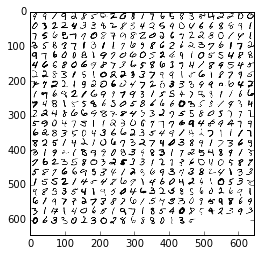

In [19]:
to_visualise=batch_xs
to_visualise=vector_to_matrix_mnist(to_visualise)
to_visualise=invert_grayscale(to_visualise)

sprite_image=create_sprite_image(to_visualise)

plt.imsave(path_for_mnist_sprites,sprite_image,cmap="gray")
plt.imshow(sprite_image,cmap='gray')
plt.show()

In [26]:
with open(path_for_mnist_metadata,'w') as f:
    f.write("Index\tLabel\n")
    for index,label in enumerate(batch_ys):
        f.write("%d\t%d\n" %(index,label))